<a href="https://colab.research.google.com/github/Amadou794545/Prevision-de-survie-des-arbres/blob/main/Pr%C3%A9vision_de_survie_des_arbres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Explication du dataset  

* No: Seedling unique ID number.
  
  Plot: Number of the field plot the seedling was planted in. (1-18)

  Subplot: Subplot within the main plot the seedling was planted in. Broken into 5 subplots (1 per corner, plus 1 in the middle). (A-E Species: Includes Acer saccharum, Prunus serotina, Quercus alba, and Quercus rubra
  
  Light ISF: Light level quantified with HemiView software. Represents the amount of light reaching each subplot at a height of 1m.
  
  Light Cat: Categorical light level created by splitting the range of Light_ISF values into three bins (low, med, high).

  Core: Year the soil core was removed from the field.

  Soil: Species from which the soil core was taken. Includes all species, plus Acer rubrum, Populus grandidentata, and a sterilized conspecific for each species.
  
  Adult: Individual tree that soil was taken from. Up to 6 adults per species. Used as a random effect in analyses.

  Sterile: Whether the soil was sterilized or not.
  
  Conspecific: Whether the soil was conspecific, heterospecific, or sterilized conspecific.
  
  Myco: Mycorrhizal type of the seedling species (AMF or EMF).
  
  SoilMyco: Mycorrhizal type of the species culturing the soil (AMF or EMF).
  
  PlantDate: The date that seedlings were planted in the field pots.
  
  AMF: Percent arbuscular mycorrhizal fungi colonization on the fine roots of harvested seedlings.

  EMF: Percent ectomycorrhizal fungi colonization on the root tips of harvested seedlings.
  
  Phenolics: Calculated as nmol Gallic acid equivalents per mg dry extract (see manuscript for detailed methods)
  
  NSC: Calculated as percent dry mass nonstructural carbohydrates (see manuscript for detailed methods)
  
  Lignin: Calculated as percent dry mass lignin (see manuscript for detailed methods)
  
  Census: The census number at which time the seedling died or was harvested.
  
  Time: The number of days at which time the seedling died or was harvested.
  
  Event: Used for survival analysis to indicate status of each individual seedling at a given time (above) 0 = harvested or experiment ended 1 = dead Harvest: Indicates whether the seedling was harvested for trait measurement.
  
  Alive: Indicates if the seedling was alive at the end of the second growing season. "X" in this field indicates alive status.


* Non : Numéro d’identification unique du semis.
  
  Parcelle : Nombre de la parcelle dans laquelle le semis a été planté (1-18).
  
  Sous-parcelle : Sous-parcelle dans la parcelle principale où le semis a été planté. Divisée en 5 sous-parcelles (1 par coin, plus 1 au milieu) (A-E).
  
  Espèces : Comprend Acer saccharum, Prunus serotina, Quercus alba et Quercus rubra.
  
  Light ISF : Niveau de lumière quantifié avec le logiciel HemiView. Représente la quantité de lumière atteignant chaque sous-plot à une hauteur de 1m.
  
  Light Cat : niveau de lumière catégorique créé en divisant la plage des valeurs Light_ISF en trois compartiments (faible, moyenne et élevée).
  
  Noyau : Année où le noyau du sol a été retiré du champ.
  
  Sol : Espèce dont le noyau du sol a été prélevé. Comprend toutes les espèces, plus Acer rubrum, Populus grandidentata et une conspécifique stérilisée pour chaque espèce.
  
  Adulte : Arbre individuel dont le sol a été prélevé. Jusqu’à 6 adultes par espèce. Utilisé comme effet aléatoire dans les analyses.
  
  Stérile : Si le sol a été stérilisé ou non.
  
  Conspécifique : Si le sol était conspécifique, hétérospécifique ou stérilisé.
  
  Myco : Type de mycorhize de l’espèce de semis (AMF ou EMF).
  
  SoilMyco : Type de mycorhize de l’espèce cultivant le sol (AMF ou EMF).
  
  PlantDate : Date à laquelle les semis ont été plantés dans les pots de culture.
  
  AMF : Pourcentage de colonisation par des champignons mycorhiziens arbusculaires sur les fines racines des semis récoltés.
  
  EMF : Pourcentage de colonisation par des champignons ectomycorrhizants sur les pointes racinaires des semis récoltés.
  
  Phénols : Calculé en nmol d’acide gallique équivalent par mg d’extrait sec (voir le manuscrit pour les méthodes détaillées).
  
  NSC : Calculé en pourcentage de la masse sèche des glucides non structuraux (voir le manuscrit pour les méthodes détaillées).
  
  Lignine : calculée en pourcentage de la masse sèche de lignine (voir le manuscrit pour les méthodes détaillées).
  
  Recensement : Le nombre de recensement au moment où le semis est mort ou a été récolté.
  
  Heure : Nombre de jours au cours desquels le semis est mort ou a été récolté.
  
  Événement : Utilisé pour l’analyse de survie afin d’indiquer le statut de chaque semis individuel à un moment donné (ci-dessus)
  
  0 = récolté ou expérience terminée
  
  1 = mort
  
  Récolte : Indique si le semis a été récolté pour la mesure des traits.
  
  Vivant : Indique si le semis était vivant à la fin de la deuxième saison de croissance. "X" dans ce champ indique l’état de vie.

#Importation

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier # Import from sklearn.neighbors


#Importation du dataset

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yekenot/tree-survival-prediction")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/yekenot/tree-survival-prediction/versions/1


In [7]:
import os
print(os.listdir('/root/.cache/kagglehub/datasets/yekenot/tree-survival-prediction/versions/1'))


['Tree_Data.csv']


In [8]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/yekenot/tree-survival-prediction/versions/1/Tree_Data.csv', delimiter=',')
df.dataframeName = 'Tree_Data.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')
df.head()


There are 2783 rows and 24 columns


,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,...,22.00,NaN,-0.56,13.86,12.15,4,14.0,1.0,NaN,NaN
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,...,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,NaN,X
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,...,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0,NaN,NaN
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,...,22.23,NaN,-0.71,14.29,12.36,4,14.0,1.0,NaN,NaN
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,...,21.15,NaN,-0.58,10.85,11.20,4,14.0,1.0,NaN,NaN


#Nettoyage du dataset

In [9]:
df.shape

(2783, 24)

In [10]:
df.isnull().sum()

,0
No,0
Plot,0
Subplot,0
Species,0
Light_ISF,0
Light_Cat,0
Core,0
Soil,0
Adult,0
Sterile,0


In [11]:
df.dropna(subset=['Event'], inplace=True)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2782 entries, 0 to 2782
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           2782 non-null   int64  
 1   Plot         2782 non-null   int64  
 2   Subplot      2782 non-null   object 
 3   Species      2782 non-null   object 
 4   Light_ISF    2782 non-null   float64
 5   Light_Cat    2782 non-null   object 
 6   Core         2782 non-null   int64  
 7   Soil         2782 non-null   object 
 8   Adult        2782 non-null   object 
 9   Sterile      2782 non-null   object 
 10  Conspecific  2782 non-null   object 
 11  Myco         2782 non-null   object 
 12  SoilMyco     2782 non-null   object 
 13  PlantDate    2782 non-null   object 
 14  AMF          2782 non-null   float64
 15  EMF          1282 non-null   float64
 16  Phenolics    2782 non-null   float64
 17  Lignin       2782 non-null   float64
 18  NSC          2782 non-null   float64
 19  Census     

In [13]:
df.drop('Adult', axis=1, inplace=True)
df.drop('Harvest',axis=1, inplace=True)
df.drop('Alive',axis=1, inplace=True)


In [14]:
df

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Sterile,Conspecific,...,SoilMyco,PlantDate,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,Non-Sterile,Heterospecific,...,AMF,6/11/18,22.00,NaN,-0.56,13.86,12.15,4,14.0,1.0
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,Non-Sterile,Heterospecific,...,EMF,5/25/18,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,Non-Sterile,Heterospecific,...,AMF,5/31/18,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,Non-Sterile,Heterospecific,...,AMF,6/11/18,22.23,NaN,-0.71,14.29,12.36,4,14.0,1.0
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,Non-Sterile,Heterospecific,...,AMF,6/11/18,21.15,NaN,-0.58,10.85,11.20,4,14.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,7086,17,C,Quercus alba,0.122,High,2017,Quercus rubra,Non-Sterile,Heterospecific,...,EMF,5/25/18,10.89,39.00,5.53,21.44,18.99,16,56.0,1.0
2778,7165,17,B,Prunus serotina,0.111,Med,2017,Populus grandidentata,Non-Sterile,Heterospecific,...,EMF,6/7/18,40.89,NaN,0.83,9.15,11.88,16,56.0,1.0
2779,7217,17,D,Quercus alba,0.118,Med,2017,Acer rubrum,Non-Sterile,Heterospecific,...,AMF,5/25/18,15.47,32.82,4.88,19.01,23.50,16,56.0,1.0
2780,7306,17,D,Quercus alba,0.118,Med,2017,Quercus rubra,Non-Sterile,Heterospecific,...,EMF,5/25/18,11.96,37.67,5.51,21.13,19.10,16,56.0,1.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2782 entries, 0 to 2782
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           2782 non-null   int64  
 1   Plot         2782 non-null   int64  
 2   Subplot      2782 non-null   object 
 3   Species      2782 non-null   object 
 4   Light_ISF    2782 non-null   float64
 5   Light_Cat    2782 non-null   object 
 6   Core         2782 non-null   int64  
 7   Soil         2782 non-null   object 
 8   Sterile      2782 non-null   object 
 9   Conspecific  2782 non-null   object 
 10  Myco         2782 non-null   object 
 11  SoilMyco     2782 non-null   object 
 12  PlantDate    2782 non-null   object 
 13  AMF          2782 non-null   float64
 14  EMF          1282 non-null   float64
 15  Phenolics    2782 non-null   float64
 16  Lignin       2782 non-null   float64
 17  NSC          2782 non-null   float64
 18  Census       2782 non-null   int64  
 19  Time       

In [16]:
df['Species'].unique()


array(['Acer saccharum', 'Quercus alba', 'Quercus rubra',
       'Prunus serotina'], dtype=object)

In [17]:
df['Soil'].unique()


array(['Prunus serotina', 'Quercus rubra', 'Acer rubrum',
       'Populus grandidentata', 'Sterile', 'Acer saccharum',
       'Quercus alba'], dtype=object)

In [18]:
df['Light_Cat'].unique()


array(['Med', 'Low', 'High'], dtype=object)

In [19]:
def convert_object_to_category(df):

    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].astype('category')
    return df

convert_object_to_category(df)

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Sterile,Conspecific,...,SoilMyco,PlantDate,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,Non-Sterile,Heterospecific,...,AMF,6/11/18,22.00,NaN,-0.56,13.86,12.15,4,14.0,1.0
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,Non-Sterile,Heterospecific,...,EMF,5/25/18,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,Non-Sterile,Heterospecific,...,AMF,5/31/18,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,Non-Sterile,Heterospecific,...,AMF,6/11/18,22.23,NaN,-0.71,14.29,12.36,4,14.0,1.0
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,Non-Sterile,Heterospecific,...,AMF,6/11/18,21.15,NaN,-0.58,10.85,11.20,4,14.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,7086,17,C,Quercus alba,0.122,High,2017,Quercus rubra,Non-Sterile,Heterospecific,...,EMF,5/25/18,10.89,39.00,5.53,21.44,18.99,16,56.0,1.0
2778,7165,17,B,Prunus serotina,0.111,Med,2017,Populus grandidentata,Non-Sterile,Heterospecific,...,EMF,6/7/18,40.89,NaN,0.83,9.15,11.88,16,56.0,1.0
2779,7217,17,D,Quercus alba,0.118,Med,2017,Acer rubrum,Non-Sterile,Heterospecific,...,AMF,5/25/18,15.47,32.82,4.88,19.01,23.50,16,56.0,1.0
2780,7306,17,D,Quercus alba,0.118,Med,2017,Quercus rubra,Non-Sterile,Heterospecific,...,EMF,5/25/18,11.96,37.67,5.51,21.13,19.10,16,56.0,1.0


In [20]:
df.drop('EMF', axis=1, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2782 entries, 0 to 2782
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   No           2782 non-null   int64   
 1   Plot         2782 non-null   int64   
 2   Subplot      2782 non-null   category
 3   Species      2782 non-null   category
 4   Light_ISF    2782 non-null   float64 
 5   Light_Cat    2782 non-null   category
 6   Core         2782 non-null   int64   
 7   Soil         2782 non-null   category
 8   Sterile      2782 non-null   category
 9   Conspecific  2782 non-null   category
 10  Myco         2782 non-null   category
 11  SoilMyco     2782 non-null   category
 12  PlantDate    2782 non-null   category
 13  AMF          2782 non-null   float64 
 14  Phenolics    2782 non-null   float64 
 15  Lignin       2782 non-null   float64 
 16  NSC          2782 non-null   float64 
 17  Census       2782 non-null   int64   
 18  Time         2782 non-null   floa

In [22]:
def encode_categorical_as_numeric(df):

    categorical_columns = df.select_dtypes(include=['category']).columns
    mapping_dict = {}

    if categorical_columns.empty:
        print("Aucune variable catégorielle à encoder.")
        return df, mapping_dict

    print("Équivalence des variables catégorielles :\n")

    for col in categorical_columns:
        # Création du mapping unique pour chaque colonne
        unique_values = df[col].cat.categories
        mapping = {val: idx for idx, val in enumerate(unique_values)}
        mapping_dict[col] = mapping

        # Remplacement des valeurs dans le DataFrame
        df[col] = df[col].map(mapping)

        # Affichage des équivalences
        print(f"Colonne '{col}':")
        for val, idx in mapping.items():
            print(f"  - {val} → {idx}")
        print("\n" + "-"*30 + "\n")

    return df, mapping_dict

encode_categorical_as_numeric(df)

Équivalence des variables catégorielles :

Colonne 'Subplot':
  - A → 0
  - B → 1
  - C → 2
  - D → 3
  - E → 4

------------------------------

Colonne 'Species':
  - Acer saccharum → 0
  - Prunus serotina → 1
  - Quercus alba → 2
  - Quercus rubra → 3

------------------------------

Colonne 'Light_Cat':
  - High → 0
  - Low → 1
  - Med → 2

------------------------------

Colonne 'Soil':
  - Acer rubrum → 0
  - Acer saccharum → 1
  - Populus grandidentata → 2
  - Prunus serotina → 3
  - Quercus alba → 4
  - Quercus rubra → 5
  - Sterile → 6

------------------------------

Colonne 'Sterile':
  - Non-Sterile → 0
  - Sterile → 1

------------------------------

Colonne 'Conspecific':
  - Conspecific → 0
  - Heterospecific → 1
  - Sterilized → 2

------------------------------

Colonne 'Myco':
  - AMF → 0
  - EMF → 1

------------------------------

Colonne 'SoilMyco':
  - AMF → 0
  - EMF → 1
  - Sterile → 2

------------------------------

Colonne 'PlantDate':
  - 5/10/18 → 0
  - 5/17

(        No  Plot Subplot Species  Light_ISF Light_Cat  Core Soil Sterile  \
 0      126     1       2       0      0.106         2  2017    3       0   
 1       11     1       2       2      0.106         2  2017    5       0   
 2       12     1       2       3      0.106         2  2017    3       0   
 3     2823     7       3       0      0.080         2  2016    3       0   
 4     5679    14       0       0      0.060         1  2017    3       0   
 ...    ...   ...     ...     ...        ...       ...   ...  ...     ...   
 2777  7086    17       2       2      0.122         0  2017    5       0   
 2778  7165    17       1       1      0.111         2  2017    2       0   
 2779  7217    17       3       2      0.118         2  2017    0       0   
 2780  7306    17       3       2      0.118         2  2017    5       0   
 2782  7401    18       0       1      0.141         0  2016    2       0   
 
      Conspecific Myco SoilMyco PlantDate    AMF  Phenolics  Lignin    NSC

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2782 entries, 0 to 2782
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   No           2782 non-null   int64   
 1   Plot         2782 non-null   int64   
 2   Subplot      2782 non-null   category
 3   Species      2782 non-null   category
 4   Light_ISF    2782 non-null   float64 
 5   Light_Cat    2782 non-null   category
 6   Core         2782 non-null   int64   
 7   Soil         2782 non-null   category
 8   Sterile      2782 non-null   category
 9   Conspecific  2782 non-null   category
 10  Myco         2782 non-null   category
 11  SoilMyco     2782 non-null   category
 12  PlantDate    2782 non-null   category
 13  AMF          2782 non-null   float64 
 14  Phenolics    2782 non-null   float64 
 15  Lignin       2782 non-null   float64 
 16  NSC          2782 non-null   float64 
 17  Census       2782 non-null   int64   
 18  Time         2782 non-null   floa

In [26]:
df["Event"] = df["Event"].astype("category")

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2782 entries, 0 to 2782
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   No           2782 non-null   int64   
 1   Plot         2782 non-null   int64   
 2   Subplot      2782 non-null   category
 3   Species      2782 non-null   category
 4   Light_ISF    2782 non-null   float64 
 5   Light_Cat    2782 non-null   category
 6   Core         2782 non-null   int64   
 7   Soil         2782 non-null   category
 8   Sterile      2782 non-null   category
 9   Conspecific  2782 non-null   category
 10  Myco         2782 non-null   category
 11  SoilMyco     2782 non-null   category
 12  PlantDate    2782 non-null   category
 13  AMF          2782 non-null   float64 
 14  Phenolics    2782 non-null   float64 
 15  Lignin       2782 non-null   float64 
 16  NSC          2782 non-null   float64 
 17  Census       2782 non-null   int64   
 18  Time         2782 non-null   floa

#EDA

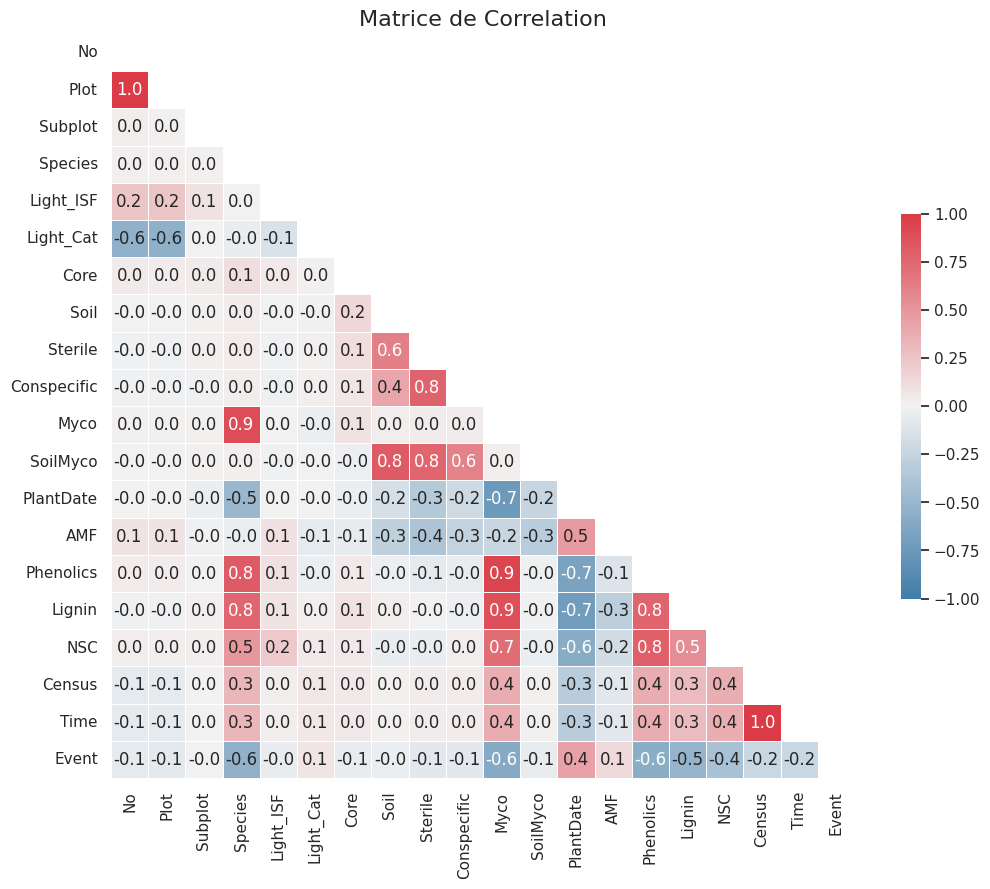

In [28]:
def plot_correlation_matrix(corr_mat):
  sns.set(style="white")
  mask = np.zeros_like(corr_mat, dtype=bool)
  mask[np.triu_indices_from(mask)] = True
  fig, ax = plt.subplots(figsize=(12, 10))
  cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
  sns.heatmap(
      corr_mat, mask=mask, cmap=cmap, annot=True,
      fmt=".1f", vmin=-1, vmax=1, center=0, square=True,
      linewidths=.5, cbar_kws={"shrink": .5}, ax=ax
  )
  ax.set_title("Matrice de Correlation", fontsize=16)
  sns.set(style="darkgrid")

corr_mat = df.corr()
plot_correlation_matrix(corr_mat)

* variable qui se demarque : Species , Myco , PlantDate , Phenolics , Lignin , Census , Time
* forte corrélation negative entre Species , myco , phenolics avec Event
*

In [41]:
# Sélectionner les variables corrélées avec Event
corr_target = corr_mat["Event"].abs()
important_features = corr_target[corr_target > 0.1].index.tolist()

print("Variables importantes selon la corrélation :", important_features)

important_features = df[important_features]

Variables importantes selon la corrélation : ['Species', 'Myco', 'PlantDate', 'AMF', 'Phenolics', 'Lignin', 'NSC', 'Census', 'Time', 'Event']


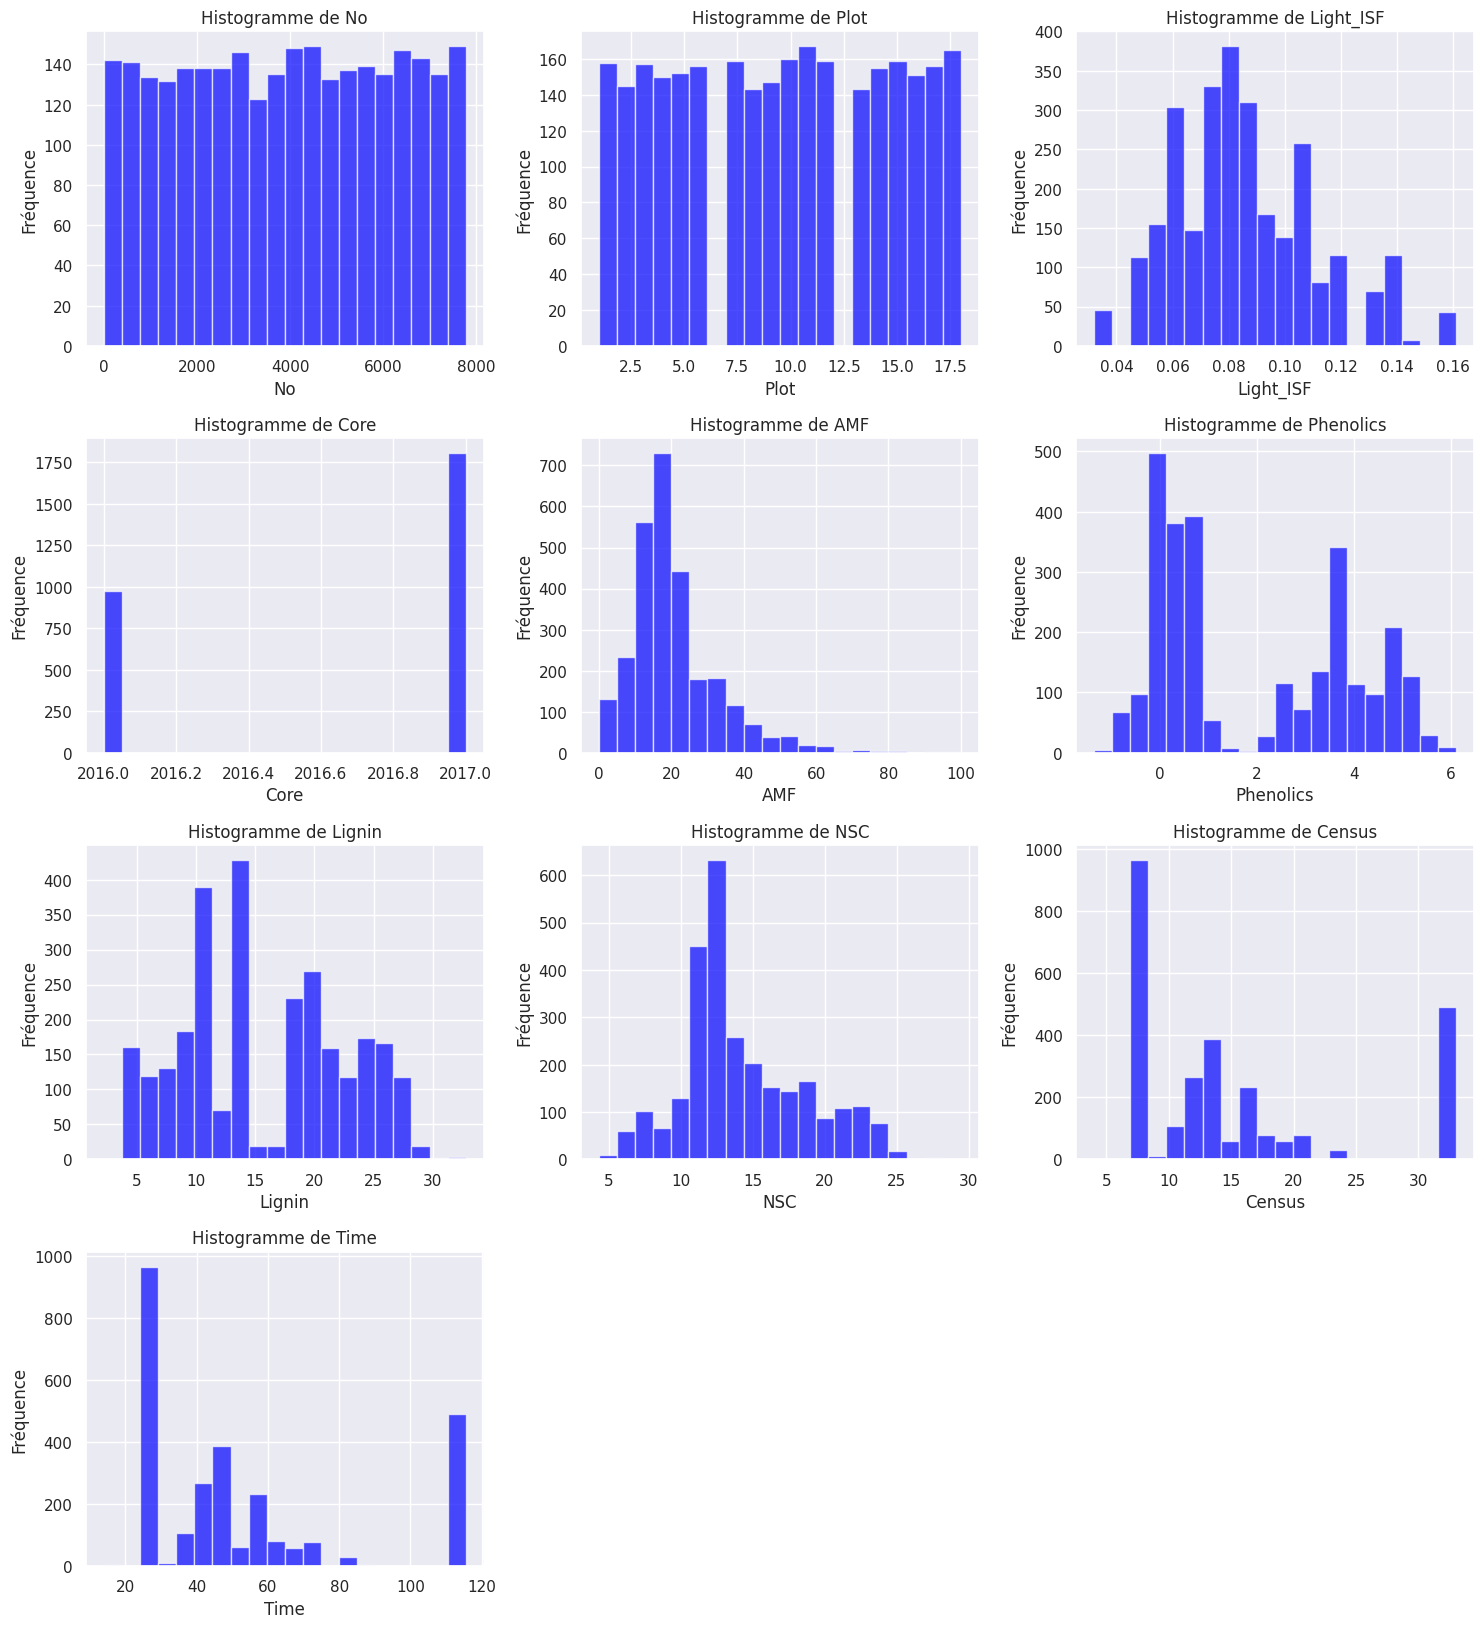

In [35]:
 # Sélectionner uniquement les colonnes numériques
numeric_columns = df.select_dtypes(include='number')
 # Afficher un histogramme pour chaque colonne numérique
plt.figure(figsize=(15, 20))  # Adapter la taille de la figure en fonction du nombre de colonnes
num_cols = len(numeric_columns.columns)
 # Créer une grille de sous-graphiques adaptée au nombre de colonnes numériques
for i, column in enumerate(numeric_columns.columns):
    plt.subplot(5, 3, i + 1)  # Adapté à 15 colonnes numériques
    plt.hist(df[column], bins=20, color='blue', alpha=0.7)
    plt.title(f'Histogramme de {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()
plt.close()

Analyse univariée de la colonne 'Subplot':

Fréquence des catégories :
Subplot
0    0.251977
3    0.239037
1    0.238318
2    0.232207
4    0.038462
Name: proportion, dtype: float64



<ipython-input-37-2a32bb71e75e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set1')


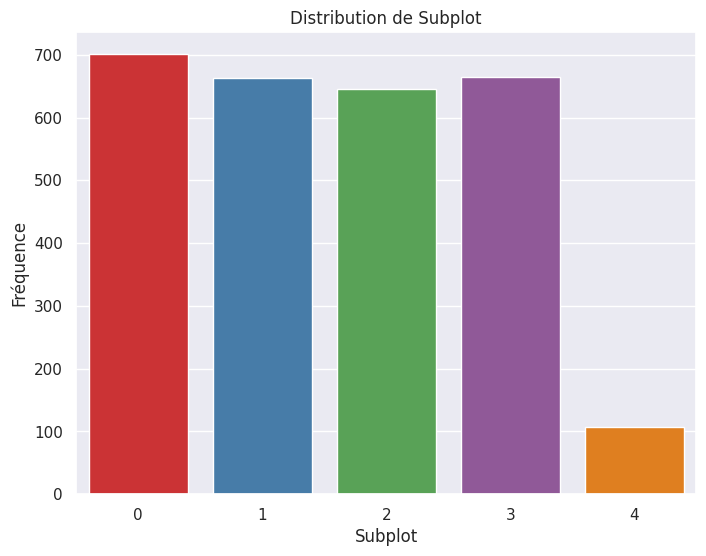

Analyse univariée de la colonne 'Species':

Fréquence des catégories :
Species
0    0.269950
1    0.269231
2    0.241553
3    0.219267
Name: proportion, dtype: float64



<ipython-input-37-2a32bb71e75e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set1')


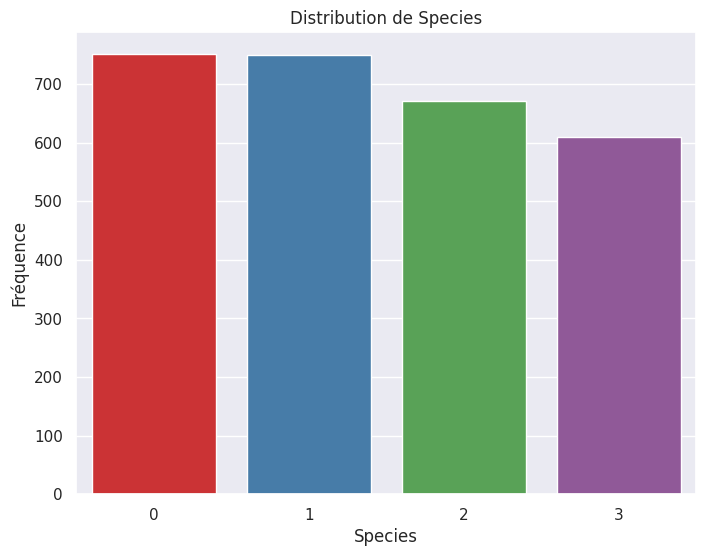

Analyse univariée de la colonne 'Light_Cat':

Fréquence des catégories :
Light_Cat
2    0.529835
1    0.361251
0    0.108914
Name: proportion, dtype: float64



<ipython-input-37-2a32bb71e75e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set1')


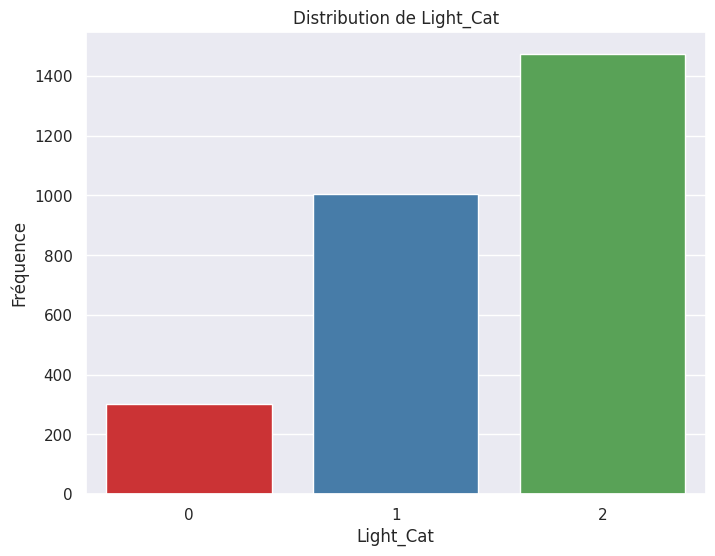

Analyse univariée de la colonne 'Soil':

Fréquence des catégories :
Soil
6    0.151689
3    0.148454
5    0.144500
1    0.142703
2    0.140546
4    0.136952
0    0.135155
Name: proportion, dtype: float64



<ipython-input-37-2a32bb71e75e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set1')


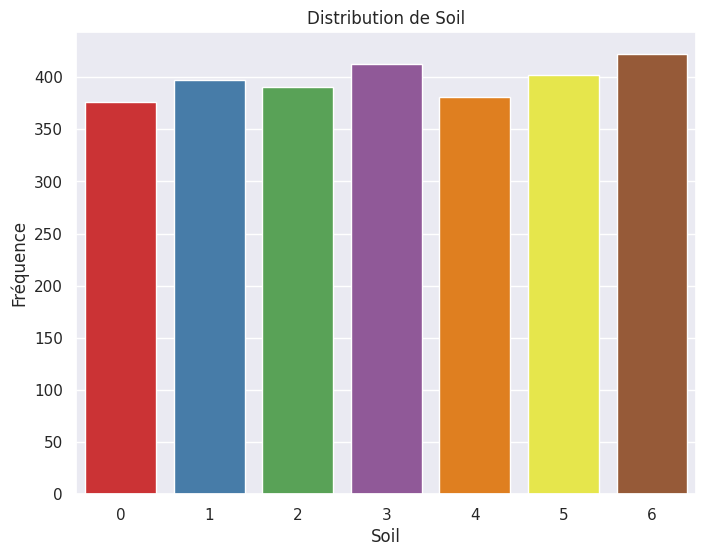

Analyse univariée de la colonne 'Sterile':

Fréquence des catégories :
Sterile
0    0.848311
1    0.151689
Name: proportion, dtype: float64



<ipython-input-37-2a32bb71e75e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set1')


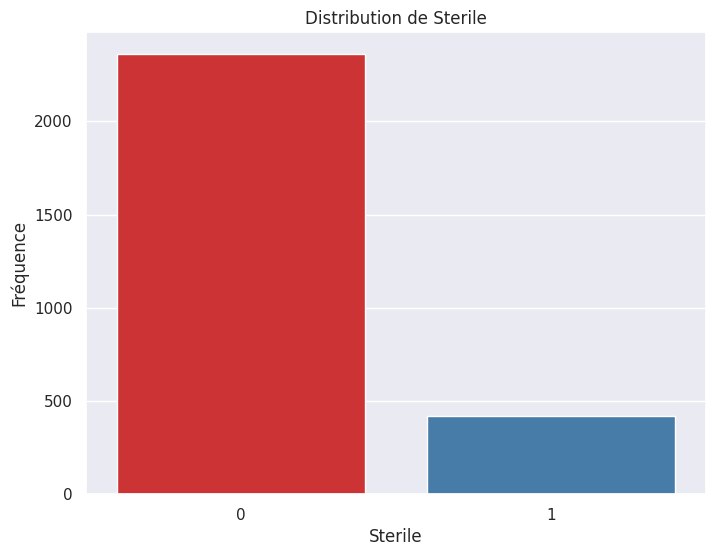

Analyse univariée de la colonne 'Conspecific':

Fréquence des catégories :
Conspecific
1    0.709561
2    0.151689
0    0.138749
Name: proportion, dtype: float64



<ipython-input-37-2a32bb71e75e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set1')


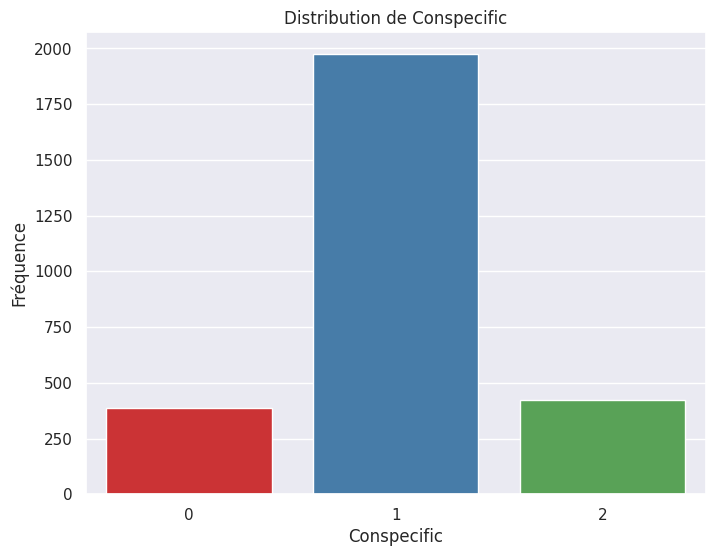

Analyse univariée de la colonne 'Myco':

Fréquence des catégories :
Myco
0    0.53918
1    0.46082
Name: proportion, dtype: float64



<ipython-input-37-2a32bb71e75e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set1')


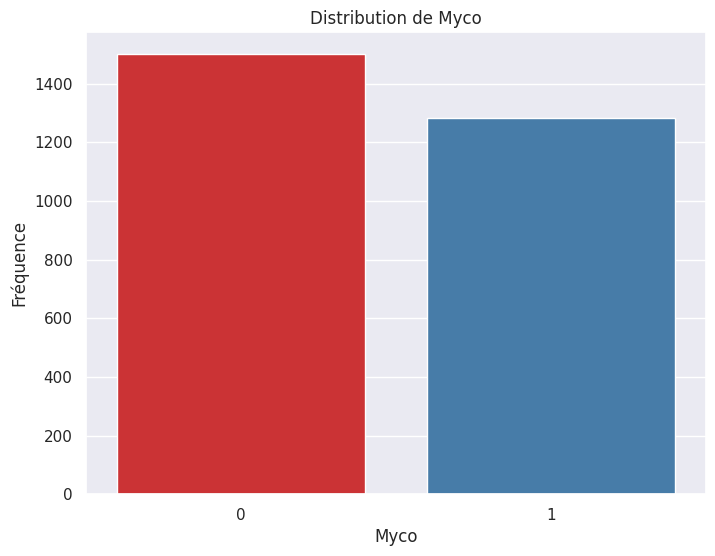

Analyse univariée de la colonne 'SoilMyco':

Fréquence des catégories :
SoilMyco
0    0.426312
1    0.421999
2    0.151689
Name: proportion, dtype: float64



<ipython-input-37-2a32bb71e75e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set1')


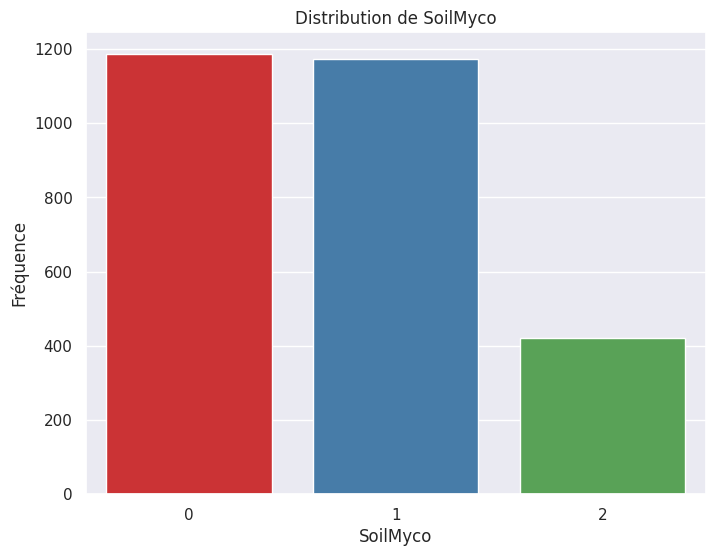

Analyse univariée de la colonne 'PlantDate':

Fréquence des catégories :
PlantDate
17    0.122214
14    0.101366
9     0.098490
10    0.094536
7     0.084831
6     0.080877
15    0.076204
18    0.061826
4     0.051761
1     0.048167
3     0.046729
5     0.031272
16    0.026240
11    0.022646
13    0.021208
8     0.020489
2     0.004313
0     0.003954
12    0.002876
Name: proportion, dtype: float64



<ipython-input-37-2a32bb71e75e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set1')


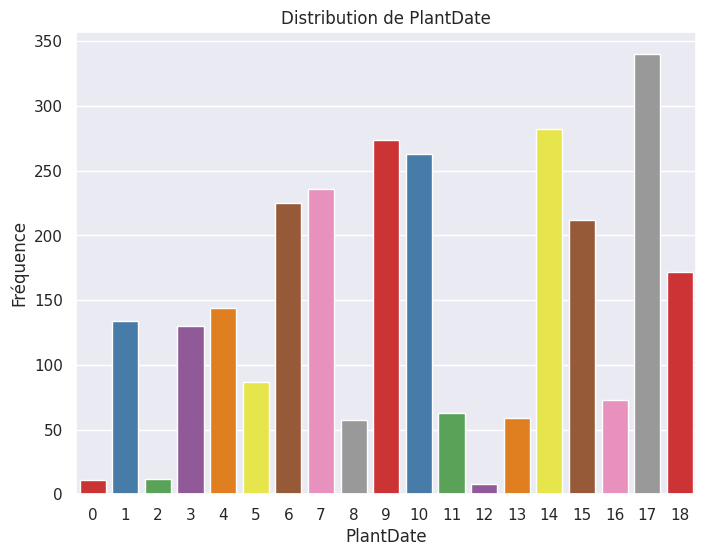

Analyse univariée de la colonne 'Event':

Fréquence des catégories :
Event
1.0    0.570453
0.0    0.429547
Name: proportion, dtype: float64



<ipython-input-37-2a32bb71e75e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set1')


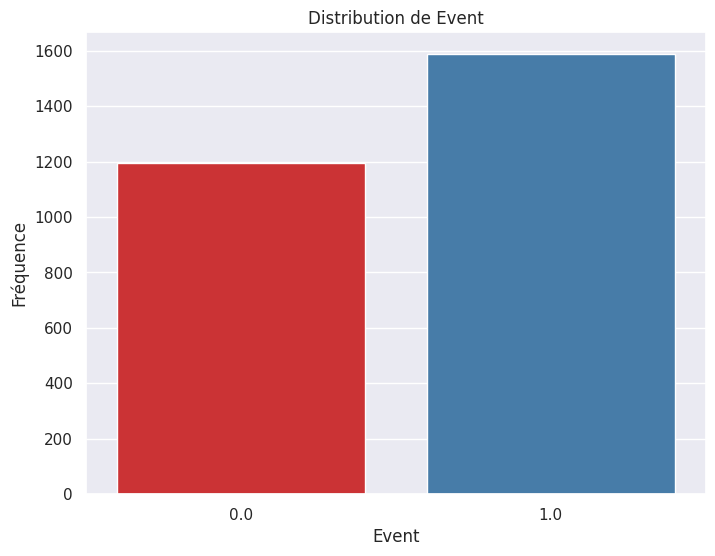

In [37]:
# Diagrammes à barres
for column in df.columns:
  if df[column].dtype == 'category':
      print(f"Analyse univariée de la colonne '{column}':\n")

      # Compter les occurrences de chaque catégorie
      value_counts = df[column].value_counts(normalize=True)
      print(f"Fréquence des catégories :\n{value_counts}\n")

      # Afficher un graphique à barres pour visualiser la distribution
      plt.figure(figsize=(8, 6))
      sns.countplot(data=df, x=column, palette='Set1')
      plt.title(f'Distribution de {column}')
      plt.xlabel(column)
      plt.ylabel('Fréquence')
      plt.show()
      plt.close()

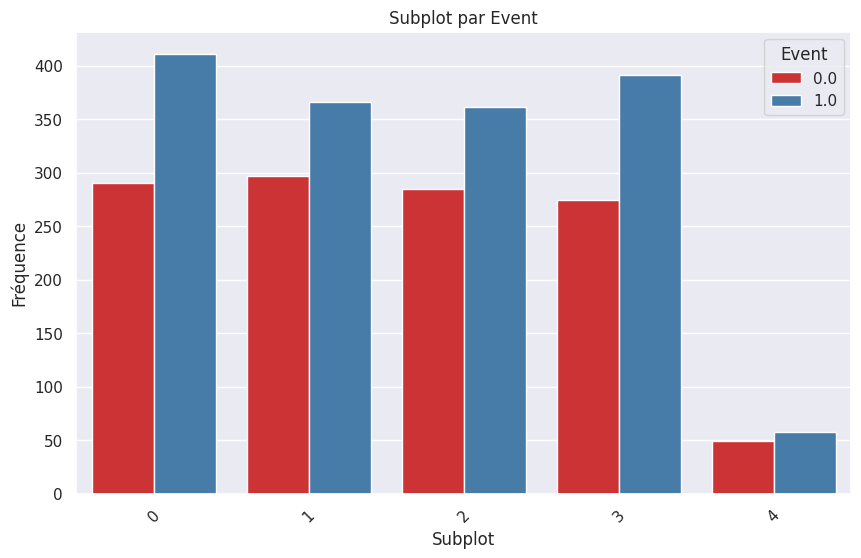

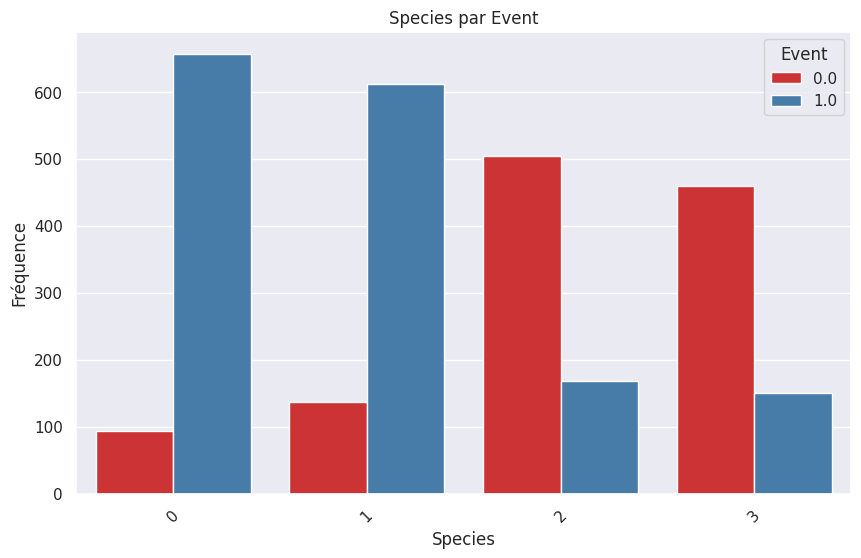

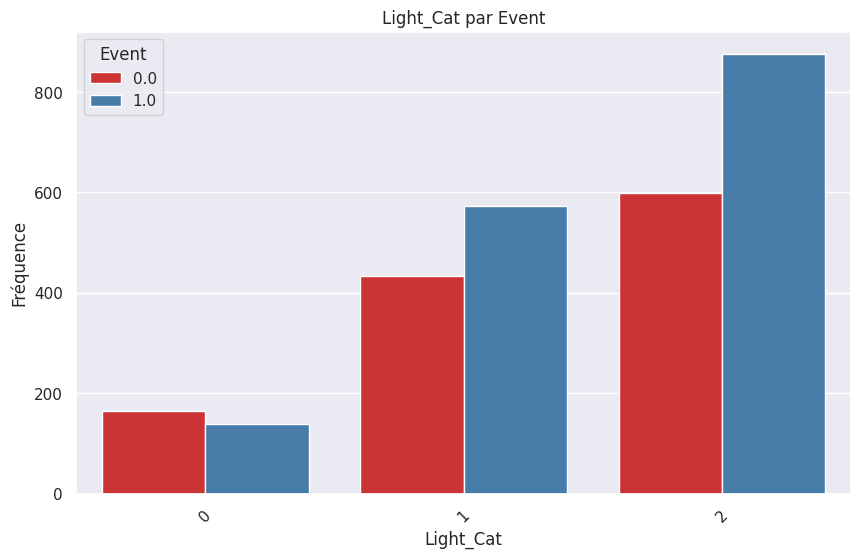

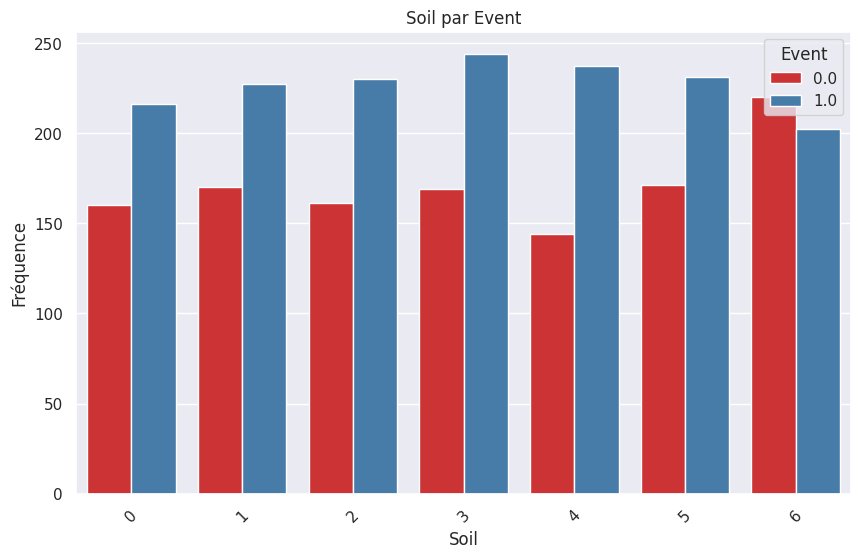

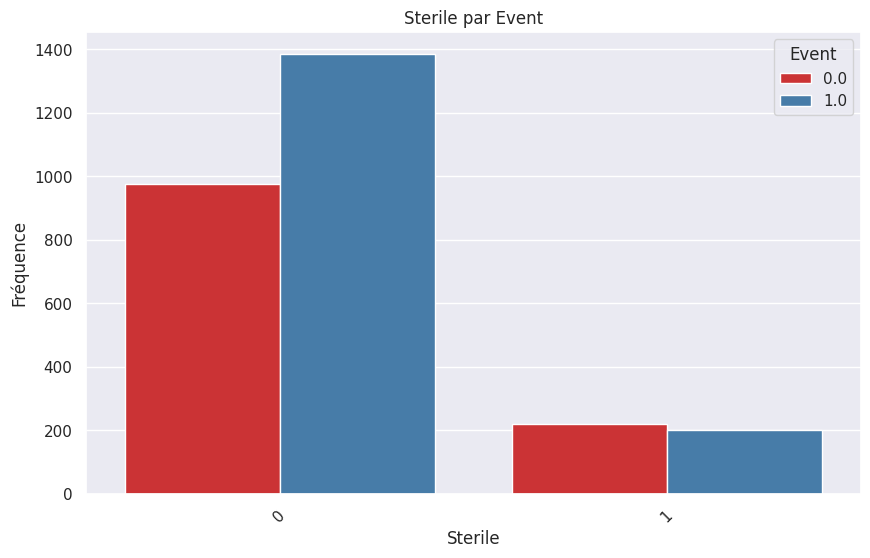

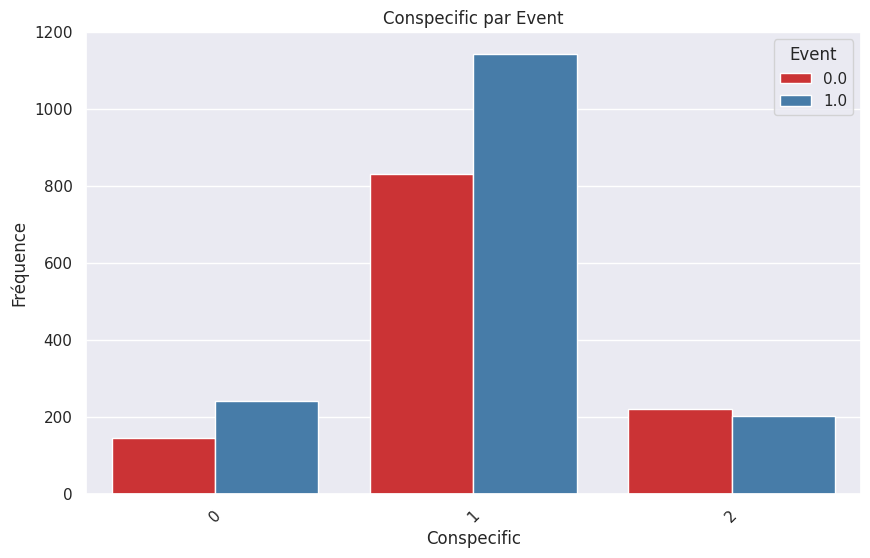

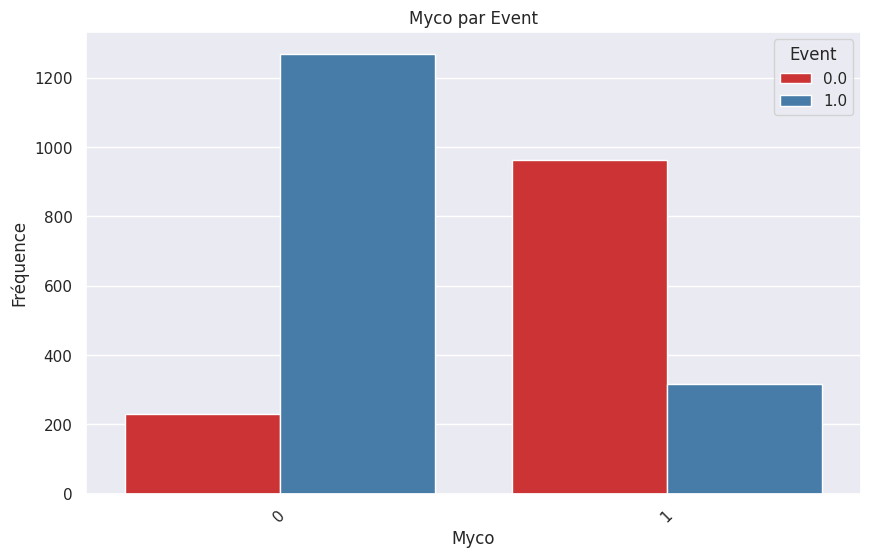

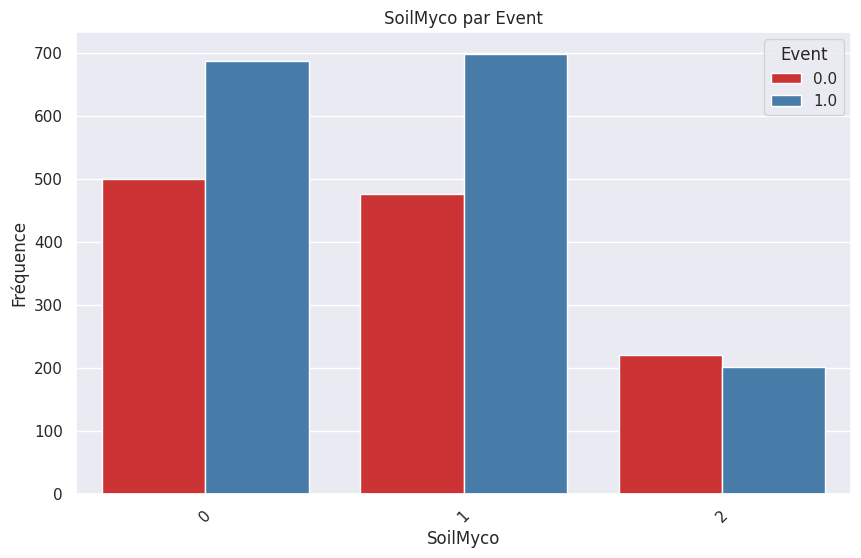

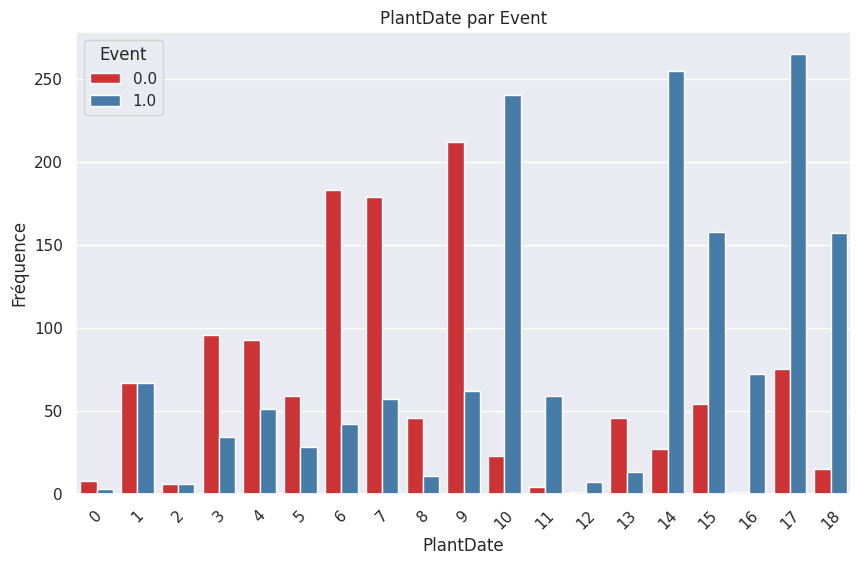

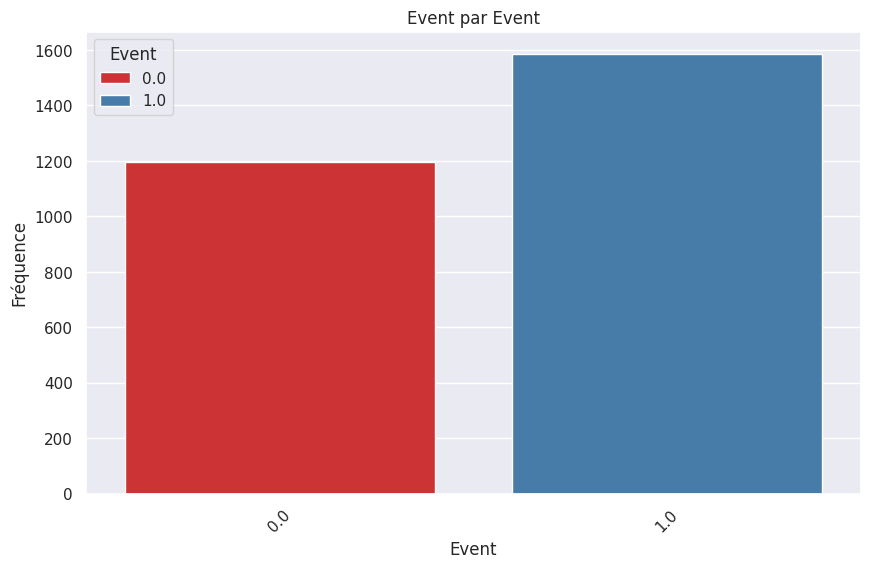

In [39]:
# Créer des graphiques à barres pour chaque colonne
def plot_bar_graphs(df,cat_var):
  for column in df.columns:
    if df[column].dtype == 'category':
      plt.figure(figsize=(10, 6))
      sns.countplot(data=df, x=column, hue=cat_var, palette='Set1')

      # Personnalisation du graphique
      plt.title(column + ' par ' + cat_var)
      plt.xlabel(column)
      plt.ylabel('Fréquence')
      plt.xticks(rotation=45)  # Faire pivoter les étiquettes de l'axe des x pour plus de lisibilité

      # Afficher le graphique
      plt.legend(title=cat_var)
      plt.show()
      plt.close()

plot_bar_graphs(df,'Event')

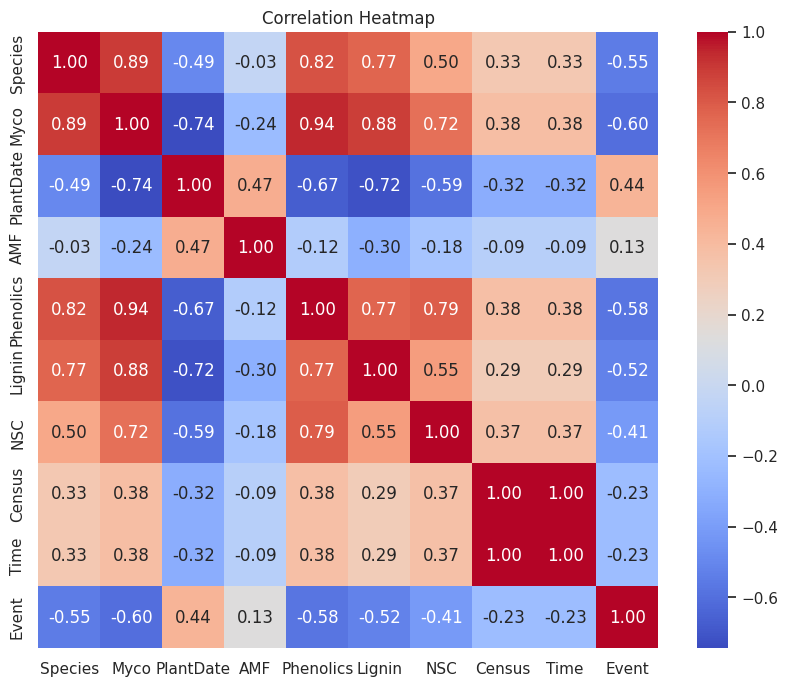

In [42]:
plt.figure(figsize=(10, 8))
corr_mat = important_features.corr()
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#modélisation

In [51]:
X = important_features.drop('Event', axis=1)
y = important_features['Event']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
y_pred = rf_classifier.predict(X_test)

In [54]:
#évaluation du model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[226   8]
 [  8 315]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       234
         1.0       0.98      0.98      0.98       323

    accuracy                           0.97       557
   macro avg       0.97      0.97      0.97       557
weighted avg       0.97      0.97      0.97       557

Accuracy Score: 0.9712746858168761


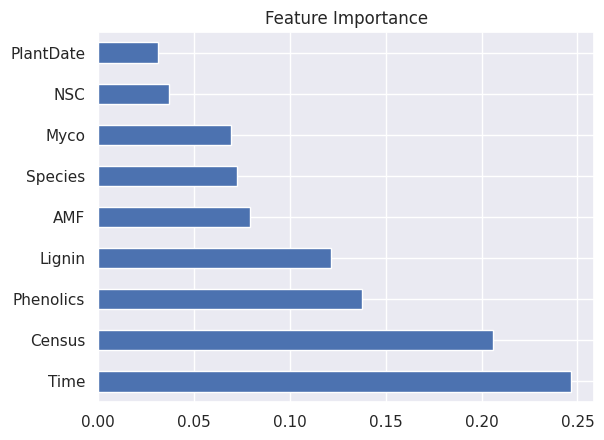

In [55]:
# Feature Importance
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feature_importances.nlargest(20).plot(kind='barh')
plt.title('Feature Importance')
plt.show()
